<a href="https://colab.research.google.com/github/pornnakanok/bsc_dpdm22/blob/main/%5Bdataprep1%5D_property_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/drive/MyDrive/bsc_DPDM_data')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/drive/MyDrive/bsc_DPDM_data


In [3]:
!ls #ดูว่ามีไฟล์อะไรบ้าง

คำตอบนักประเมิน.xlsx


In [4]:
import pandas as pd

##บ้าน

In [5]:
home = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name=0,skiprows=0)
home.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN


In [6]:
home.columns

Index(['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ปัจจัยในการประเมินราคาซื้อ-ขาย', 'เหตุผลไม่มั่นใจราคาประเมิน',
       'ให้คะแนนทรัพย์', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [7]:
home = home[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
home.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                        True
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

In [8]:
home = home.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
home.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

###คน 1

In [9]:
est1 = home[home['ID ผู้ประเมิน']==1]
est1.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [10]:
est1.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [11]:
est1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,61.0,6.100000e+01,6.100000e+01
mean,1.0,4.004721e+06,3.664754e+06
std,0.0,3.039496e+06,2.493681e+06
min,1.0,3.900000e+05,6.000000e+05
25%,1.0,2.500000e+06,2.200000e+06
50%,1.0,3.630000e+06,3.500000e+06
75%,1.0,4.774000e+06,4.500000e+06
max,1.0,2.094900e+07,1.600000e+07


In [12]:
est1['ราคาทรัพย์'].min()

390000.0

In [13]:
est1['ราคาทรัพย์'].max()

20949000.0

In [14]:
est1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     30
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    28
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

###คน 2

In [15]:
est2 = home[home['ID ผู้ประเมิน']==2]
est2.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,9000000.0,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [16]:
est2.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [17]:
est2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,61.0,6.100000e+01,6.100000e+01
mean,2.0,4.004721e+06,3.936721e+06
std,0.0,3.039496e+06,2.629380e+06
min,2.0,3.900000e+05,9.900000e+05
25%,2.0,2.500000e+06,2.400000e+06
50%,2.0,3.630000e+06,3.700000e+06
75%,2.0,4.774000e+06,4.500000e+06
max,2.0,2.094900e+07,1.700000e+07


### ความมั่นใจ

In [18]:
est1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    61
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [19]:
est2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    61
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

### ให้คะแนนทรัพย์

In [20]:
est1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     30
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    28
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

In [21]:
est2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     39
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      20
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน      1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     1
Name: ให้คะแนนทรัพย์, dtype: int64

#ที่ดิน

In [22]:
area = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name=1,skiprows=0)
area.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN


In [23]:
area.groupby(['ID ผู้ประเมิน']).count()

,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
ID ผู้ประเมิน,,,,,,,,,,,,
1,100,100,100,40,100,100,0,100,10,10,0,1
2,100,100,100,40,100,100,0,100,10,10,0,0
4,10,10,10,10,7,7,3,7,7,7,0,0


In [24]:
area.columns

Index(['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ปัจจัยในการประเมินราคาซื้อ-ขาย', 'เหตุผลไม่มั่นใจราคาประเมิน',
       'ให้คะแนนทรัพย์', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

In [25]:
area = area[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
area.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,1800000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,4,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,3000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [26]:
area.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                        True
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

In [27]:
area = area.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
area.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

## คน 1

In [28]:
area1 = area[area['ID ผู้ประเมิน']==1]
area1.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,1800000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000.0,8000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
6,1,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000.0,18000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [29]:
area1.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

## คน 2

In [30]:
area2 = area[area['ID ผู้ประเมิน']==2]
area2.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000.0,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000.0,70000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [31]:
area2.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

##ความมั่นใจ

In [32]:
area1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    40
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [33]:
area2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    40
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

##ให้คะแนนทรัพย์

In [34]:
area1.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,23,23,23,23,23,23
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,17,17,17,17,17,17


In [35]:
area2.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,19,19,19,19,19,19
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,21,21,21,21,21,21


#คอนโด

In [36]:
condo = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name=2,skiprows=0)
condo.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,603.0,คอนโด,มั่นใจ,2438000.0,2800000.0,"35,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [37]:
condo.groupby(['ID ผู้ประเมิน']).count()

,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
ID ผู้ประเมิน,,,,,,,,,,
1,10,10,10,10,10,10,0,10,10,10


In [38]:
condo = condo[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
condo.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,603.0,คอนโด,มั่นใจ,2438000.0,2800000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


In [39]:
condo.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

## คน 1

In [40]:
condo1 = condo[condo['ID ผู้ประเมิน']==1]
condo1.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,603.0,คอนโด,มั่นใจ,2438000.0,2800000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


#ทาวน์โฮม

In [41]:
townhome = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name=3,skiprows=0)
townhome.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN


In [42]:
townhome.groupby(['ID ผู้ประเมิน']).count()

,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
ID ผู้ประเมิน,,,,,,,,,,,,
1,120,120,120,61,120,120,0,120,0,0,0,1
2,120,120,120,61,120,120,0,120,0,0,0,0


In [43]:
townhome = townhome[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
townhome.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,700000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,1 ขายไม่ได้แน่นอน
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,700000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [44]:
townhome.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                        True
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [45]:
townhome = townhome.dropna(subset=['ราคาทรัพย์'])
townhome.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

## คน 1

In [46]:
th1 = townhome[townhome['ID ผู้ประเมิน']==1]
th1.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,700000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,700000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3520000.0,3500000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


## คน 2

In [47]:
th2 = townhome[townhome['ID ผู้ประเมิน']==2]
th2.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,1 ขายไม่ได้แน่นอน
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,1500000.0,1 ขายไม่ได้แน่นอน
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3520000.0,4000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


## ความมั่นใจ

In [48]:
th1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    61
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [49]:
th2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    61
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

## ให้คะแนนทรัพย์

In [50]:
th1.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,11,11,11,11,11,11
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,45,45,45,45,45,45
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,5,5,5,5,5,5


In [51]:
th2.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
1 ขายไม่ได้แน่นอน,2,2,2,2,2,2
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,6,6,6,6,6,6
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,49,49,49,49,49,49
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,3,3,3,3,3,3
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,1,1,1,1,1,1


#อาคารพาณิชย์

In [52]:
building = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name=4,skiprows=0)
building.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,10.0
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,"8,000-40,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN


In [53]:
building.groupby(['ID ผู้ประเมิน']).count()

,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
ID ผู้ประเมิน,,,,,,,,,,,,,
1,10,10,10,10,10,10,0,10,10,10,0,0,1
2,10,10,10,10,10,10,0,10,10,10,0,0,0


In [54]:
building = building[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
building.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

## คน 1

In [55]:
building1 = building[building['ID ผู้ประเมิน']==1]
building1.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,6000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
4,1,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,13500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


## คน 2

In [56]:
building2 = building[building['ID ผู้ประเมิน']==2]
building2.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,20000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


## ความมั่นใจ

In [57]:
building1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [58]:
building2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

## ให้คะแนนทรัพย์

In [59]:
building1.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,5,5,5,5,5,5
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3,3,3,3,3,3
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2,2,2,2,2,2


In [60]:
building2.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,5,5,5,5,5,5
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2,2,2,2,2,2
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,3,3,3,3,3,3


# HW1 เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนของราคาตั้งขาย ใช้ MAPE เป็นเกณฑ์ในการเปรียบเทียบ

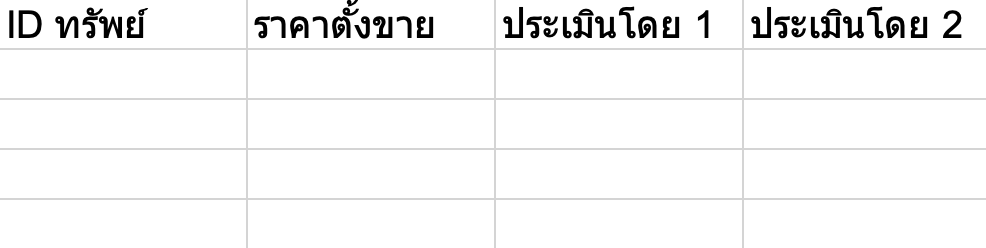

# MAPE บ้าน

In [61]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [110]:
est1MAPE = MAPE(est1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(est1['ราคาทรัพย์']))
est2MAPE = MAPE(est2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(est2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {est1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {est2MAPE*100:.2f}%')
est2['ประเมินโดย1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
est2_d = est2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดย1','ราคาทรัพย์'])
one2two = MAPE(est2_d['ประเมินราคาซื้อ-ขาย'],est2_d['ประเมินโดย1'])
two2one = MAPE(est2_d['ประเมินโดย1'],est2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(est2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 13.75%
นักประเมิน คนที่ 2 = 9.51%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 13.54%
จำนวนทรัพย์ทั้งหมด 61 ทรัพย์


In [64]:
est2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดย1
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2500000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,9000000.0,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,5000000.0
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3500000.0
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2500000.0
...,...,...,...,...,...,...,...,...
113,2,https://nayoo.co/khonkaen/posts/23,บ้านเดี่ยว,มั่นใจ,5230000.0,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,5000000.0
115,2,https://nayoo.co/khonkaen/posts/28,บ้านเดี่ยว,มั่นใจ,1750000.0,1900000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,1600000.0
187,2,https://nayoo.co/khonkaen/posts/20,บ้านเดี่ยว,มั่นใจ,2000000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3600000.0
188,2,https://nayoo.co/khonkaen/posts/31,บ้านเดี่ยว,มั่นใจ,4000000.0,3900000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,4000000.0


In [80]:
a = est2[['post id','ราคาทรัพย์','ประเมินโดย1','ประเมินราคาซื้อ-ขาย']]
a.rename(columns={'ประเมินโดย1': 'ประเมินโดย 1'}, inplace=True)
a.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย 2'}, inplace=True)
a.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0


# MAPE ที่ดิน

In [109]:
area1MAPE = MAPE(area1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(area1['ราคาทรัพย์']))
area2MAPE = MAPE(area2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(area2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {area1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {area2MAPE*100:.2f}%')
area2['ประเมินโดย1'] = area2['post id'].map(area1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
area2_d = area2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดย1','ราคาทรัพย์'])
one2two = MAPE(area2_d['ประเมินราคาซื้อ-ขาย'],area2_d['ประเมินโดย1'])
two2one = MAPE(area2_d['ประเมินโดย1'],area2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(area2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 53.94%
นักประเมิน คนที่ 2 = 25.89%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 58.21%
จำนวนทรัพย์ทั้งหมด 40 ทรัพย์


In [67]:
area2.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดย1
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1800000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000.0,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,8000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000.0,70000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,18000000.0
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000.0,60000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,35000000.0
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0


In [68]:
b = area2[['post id','ราคาทรัพย์','ประเมินโดย1','ประเมินราคาซื้อ-ขาย']]
b.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'}, inplace=True)
b.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2
1,https://nayoo.co/khonkaen/posts/1033,2800000.0,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000.0,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000.0,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000.0,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000.0,2200000.0,2500000.0


# MAPE ทาวน์โฮม

In [111]:
th1MAPE = MAPE(th1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(th1['ราคาทรัพย์']))
th2MAPE = MAPE(th2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(th2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nทาวน์โฮม\nนักประเมิน คนที่ 1 = {th1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {th2MAPE*100:.2f}%')
th2['ประเมินโดย1'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
th2_d = th2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดย1','ราคาทรัพย์'])
one2two = MAPE(th2_d['ประเมินราคาซื้อ-ขาย'],th2_d['ประเมินโดย1'])
two2one = MAPE(th2_d['ประเมินโดย1'],th2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(th2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ทาวน์โฮม
นักประเมิน คนที่ 1 = 20.12%
นักประเมิน คนที่ 2 = 15.84%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 11.66%
จำนวนทรัพย์ทั้งหมด 61 ทรัพย์


In [70]:
th2.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดย1
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,1 ขายไม่ได้แน่นอน,700000.0
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,1500000.0,1 ขายไม่ได้แน่นอน,700000.0
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3520000.0,4000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3500000.0
7,2,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3850000.0,3200000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3500000.0
9,2,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,990000.0,800000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1000000.0


In [71]:
c = th2[['post id','ราคาทรัพย์','ประเมินโดย1','ประเมินราคาซื้อ-ขาย']]
c.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'}, inplace=True)
c.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,990000.0,1000000.0,800000.0


# MAPE อาคารพาณิชย์

In [112]:
building1MAPE = MAPE(building1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(building1['ราคาทรัพย์']))
building2MAPE = MAPE(building2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(building2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nอาคารพาณิชย์\nนักประเมิน คนที่ 1 = {building1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {building2MAPE*100:.2f}%')
building2['ประเมินโดย1'] = building2['post id'].map(building1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
building2_d = building2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดย1','ราคาทรัพย์'])
one2two = MAPE(building2_d['ประเมินราคาซื้อ-ขาย'],building2_d['ประเมินโดย1'])
two2one = MAPE(building2_d['ประเมินโดย1'],building2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(building2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
อาคารพาณิชย์
นักประเมิน คนที่ 1 = 25.45%
นักประเมิน คนที่ 2 = 12.43%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 19.28%
จำนวนทรัพย์ทั้งหมด 10 ทรัพย์


In [73]:
d = building2[['post id','ราคาทรัพย์','ประเมินโดย1','ประเมินราคาซื้อ-ขาย']]
d.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'}, inplace=True)
d.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0


## เขียน function ตรวจสอบค่าที่เติม 0 ผิด

In [74]:
max(10,2)

10

In [75]:
def check_v(in1,in2):
    return max(in1/in2,in2/in1)

In [76]:
check_v(100,1200)

12.0

# สร้าง column ใหม่ ลงในตาราง home โดย ค่าใน column คือค่า จาก function check(ราคาตั้งขาย,ราคาประเมิน1)

## บ้าน

In [81]:
a.head()

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0


In [93]:
a['check1']=a.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 1']),axis=1)
a['check2']=a.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 2']),axis=1)
a

<ipython-input-93-cb4dfbe5fb35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['check1']=a.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 1']),axis=1)
<ipython-input-93-cb4dfbe5fb35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['check2']=a.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 2']),axis=1)


,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check1,check2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0,1.080000,1.000000
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0,1.181818,1.083333
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0,1.180000,1.525424
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0,1.257143,1.189189
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0,1.100000,1.100000
...,...,...,...,...,...,...
113,https://nayoo.co/khonkaen/posts/23,5230000.0,5000000.0,5000000.0,1.046000,1.046000
115,https://nayoo.co/khonkaen/posts/28,1750000.0,1600000.0,1900000.0,1.093750,1.085714
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0,1.000000,1.025641


## ที่ดิน

In [85]:
b.head()

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2
1,https://nayoo.co/khonkaen/posts/1033,2800000.0,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000.0,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000.0,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000.0,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000.0,2200000.0,2500000.0


In [87]:
b['check1']=b.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย1']),axis=1)
b['check2']=b.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย2']),axis=1)
b

<ipython-input-87-d7e01e7d07cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['check1']=b.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย1']),axis=1)
<ipython-input-87-d7e01e7d07cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['check2']=b.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย2']),axis=1)


,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
1,https://nayoo.co/khonkaen/posts/1033,2800000.0,1800000.0,2000000.0,1.555556,1.400000
4,https://nayoo.co/khonkaen/posts/1711,14900000.0,8000000.0,12000000.0,1.862500,1.241667
7,https://nayoo.co/khonkaen/posts/1726,90000000.0,18000000.0,70000000.0,5.000000,1.285714
10,https://nayoo.co/khonkaen/posts/1732,65000000.0,35000000.0,60000000.0,1.857143,1.083333
13,https://nayoo.co/khonkaen/posts/1866,3000000.0,2200000.0,2500000.0,1.363636,1.200000
16,https://nayoo.co/khonkaen/posts/1962,6000000.0,4000000.0,5000000.0,1.500000,1.200000
19,https://nayoo.co/khonkaen/posts/2007,16500000.0,3500000.0,13000000.0,4.714286,1.269231
22,https://nayoo.co/khonkaen/posts/2040,2200000.0,2500000.0,2500000.0,1.136364,1.136364
25,https://nayoo.co/khonkaen/posts/2045,12000000.0,7500000.0,10000000.0,1.600000,1.200000
28,https://nayoo.co/khonkaen/posts/2068,6700000.0,5600000.0,6000000.0,1.196429,1.116667


## townhome

In [89]:
c.head()

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,990000.0,1000000.0,800000.0


In [98]:
c['check1']=c.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย1']),axis=1)
c['check2']=c.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย2']),axis=1)
c

<ipython-input-98-ed237fecefc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['check1']=c.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย1']),axis=1)
<ipython-input-98-ed237fecefc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['check2']=c.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย2']),axis=1)


,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0,1.492857,1.435407
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0,1.335714,1.604278
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0,1.005714,1.136364
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3500000.0,3200000.0,1.100000,1.203125
9,https://nayoo.co/khonkaen/posts/582,990000.0,1000000.0,800000.0,1.010101,1.237500
...,...,...,...,...,...,...
176,https://nayoo.co/khonkaen/posts/3528,2190000.0,350000.0,400000.0,6.257143,5.475000
177,https://nayoo.co/khonkaen/posts/3599,1700000.0,1800000.0,1700000.0,1.058824,1.000000
178,https://nayoo.co/khonkaen/posts/3661,1900000.0,2000000.0,1900000.0,1.052632,1.000000
179,https://nayoo.co/khonkaen/posts/3719,1550000.0,1400000.0,1500000.0,1.107143,1.033333


## อาคารพาณิชย์

In [91]:
d.head()

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0


In [96]:
d['check1']=d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย1']),axis=1)
d['check2']=d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย2']),axis=1)
d

<ipython-input-96-8675a4e17f88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['check1']=d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย1']),axis=1)
<ipython-input-96-8675a4e17f88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['check2']=d.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย2']),axis=1)


,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0,1.166667,1.142857
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0,1.000000,1.000000
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0,1.666667,1.125000
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0,1.142857,1.142857
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0,1.772727,1.300000
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0,1.333333,1.200000
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0,1.041667,1.142857
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0,1.315789,1.000000
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0,1.000000,1.142857
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0,1.125000,1.111111


# HW2 แก้ไข ข้อมูลแล้วคำนวณ MAPE ใหม่อีกรอบมาเทียบกัน

มีแก้แค่ของที่ดิน

In [97]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

## บ้าน

In [115]:
home = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/Copy of คำตอบนักประเมิน.xlsx',sheet_name='บ้าน')
id1 = home[home['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = home[home['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2two = MAPE(id2_d['ประเมินราคาซื้อ-ขาย'],id2_d['ประเมิน2'])
two2one = MAPE(id2_d['ประเมิน2'],id2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 13.75%
นักประเมิน คนที่ 2 = 9.51%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 13.54%
จำนวนทรัพย์ทั้งหมด 61 ทรัพย์


## ที่ดิน

In [116]:
area = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/Copy of คำตอบนักประเมิน.xlsx',sheet_name='ที่ดิน')
id1 = area[area['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = area[area['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2two = MAPE(id2_d['ประเมินราคาซื้อ-ขาย'],id2_d['ประเมิน2'])
two2one = MAPE(id2_d['ประเมิน2'],id2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 53.94%
นักประเมิน คนที่ 2 = 23.82%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 42.37%
จำนวนทรัพย์ทั้งหมด 40 ทรัพย์


## townhome

In [117]:
townhome = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/Copy of คำตอบนักประเมิน.xlsx',sheet_name='ทาวน์โฮม')
id1 = townhome[townhome['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = townhome[townhome['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nทาวน์โฮม\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2two = MAPE(id2_d['ประเมินราคาซื้อ-ขาย'],id2_d['ประเมิน2'])
two2one = MAPE(id2_d['ประเมิน2'],id2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ทาวน์โฮม
นักประเมิน คนที่ 1 = 20.12%
นักประเมิน คนที่ 2 = 15.84%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 11.66%
จำนวนทรัพย์ทั้งหมด 61 ทรัพย์


## อาคารพาณิชย์

In [118]:
building = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/Copy of คำตอบนักประเมิน.xlsx',sheet_name='อาคารพาณิชย์')
id1 = building[building['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = building[building['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nอาคารพาณิชย์\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2two = MAPE(id2_d['ประเมินราคาซื้อ-ขาย'],id2_d['ประเมิน2'])
two2one = MAPE(id2_d['ประเมิน2'],id2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
อาคารพาณิชย์
นักประเมิน คนที่ 1 = 25.45%
นักประเมิน คนที่ 2 = 12.43%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 19.28%
จำนวนทรัพย์ทั้งหมด 10 ทรัพย์


จะได้ว่า ความแตกต่างระหว่างราคาประกาศขายและราคาประเมิน **ที่ดิน** ของนักประเมินคนที่ 2 ลดลง จาก 25.89% เป็น 23.82% และ ความผิดพลาดระหว่างนักประเมินทั้งสองลดลงจาก 58.21% เป็น 42.37% หลังจากทำการแก้ไขข้อมูล